In [3]:
# Shor's algorithm
# This is an algorithm created by Peter Shor, to use quantum computing to rapidly factorize large numbers.
# The below code demonstrates the underlying principles of Shor's algorithm, to the best ability of classic Python.


In [12]:
# We import numpy for math, random, and matplotlib for drawing our quantum circuit.
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [5]:
# We find the greatest common divisor using the Euclidean algorithm
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# We now check if the number is prime.
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

In [6]:
# Trial division for finding factors of the number
def trial_division(n):
    factors = []
    while n % 2 == 0:
        factors.append(2)
        n //= 2
    while n % 3 == 0:
        factors.append(3)
        n //= 3
    i = 5
    while i * i <= n:
        while n % i == 0:
            factors.append(i)
            n //= i
        while n % (i + 2) == 0:
            factors.append(i + 2)
            n //= i + 2
        i += 6
    if n > 1:
        factors.append(n)
    return factors

In [7]:
# Quantum Fourier Transform matrix. This matrix is the most important part of the algorithm and utilises complex math.
def qft_matrix(n):
    size = 2 ** n
    qft = np.zeros((size, size), dtype=complex)
    for j in range(size):
        for k in range(size):
            qft[j, k] = np.exp(2j * np.pi * j * k / size) / np.sqrt(size)
    return qft


# Modular exponentiation matrix - a way in which any number can be expressed in a range of its period of modular exponents.
def mod_exp_matrix(a, N, n):
    size = 2 ** n
    mod_exp = np.zeros((size, size), dtype=complex)
    for x in range(size):
        y = pow(a, x, N)
        mod_exp[x, y] = 1
    return mod_exp

In [8]:
# Shor's algorithm implementation
# Note this algorithm is not designed to be on classical hardware.
def shors_algorithm(a, N):
    n = int(np.ceil(np.log2(N)))
    qft = qft_matrix(n)
    mod_exp = mod_exp_matrix(a, N, n)

    state = np.zeros((2 ** n, 1), dtype=complex)
    state[0] = 1

    H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    Hn = H
    for _ in range(n - 1):
        Hn = np.kron(Hn, H)
    state = Hn @ state

    state = mod_exp @ state

    state = qft @ state

    probabilities = np.abs(state) ** 2
    result = np.argmax(probabilities)

    return result



In [9]:
# Finding a factor of N using Shor's algorithm - albeit this is not a qubit-system, we aim to represent the benefit
# of quantum hardware classically
def quantum_factor(N):
    a = random.randint(2, N - 1)
    while gcd(a, N) != 1:
        a = random.randint(2, N - 1)
    result = shors_algorithm(a, N)
    factor = gcd(result, N)
    if factor == 1 or factor == N:
        return quantum_factor(N)
    return factor


# N into its prime factors
def prime_factors(N):
    factors = trial_division(N)
    prime_factors_list = []
    for factor in factors:
        while not is_prime(factor):
            smaller_factor = quantum_factor(factor)
            prime_factors_list.append(smaller_factor)
            factor //= smaller_factor
        prime_factors_list.append(factor)
    return prime_factors_list

In [10]:
def plot_quantum_circuit(n):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, n * 4 + 4)  # Increase x-axis limit to provide more space
    ax.set_ylim(0, 1.4)

    # Create a custom colormap for the gradient background
    cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#0f2027', '#203a43', '#2c5364'])

    # Plot the background gradient
    ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), aspect='auto', cmap=cmap, extent=[0, n * 4 + 4, 0, 1.4], zorder=-1)

    # Color scheme
    register_color = '#d32f2f'  # Deep red
    hadamard_color = '#03a9f4'  # Light blue
    operation_box_color = '#b0bec5'  # Grey
    text_color = '#FFFFFF'  # White text for dark background
    mod_exp_color = '#6A0DAD'  # Deep purple
    qft_color = '#4CAF50'  # Green
    line_color = '#b0bec5'  # Grey

    # We draw the quantum registers based on the size of the number.
    for i in range(n):
        ax.plot([0, n * 4 + 3], [0.5, 0.5], color=register_color, lw=2)
        ax.text(-0.5, 0.5, f'Q{i}', verticalalignment='center', horizontalalignment='right', fontsize=12, fontweight='bold', color=text_color)

    # Draw the Hadamard gates
    for i in range(n):
        ax.plot([0.5 + i * 3, 0.5 + i * 3], [0.6, 0.4], color=hadamard_color, lw=2, linestyle='--')
        ax.text(0.5 + i * 3, 0.7, 'H', fontsize=12, color=text_color, fontweight='bold', ha='center')

    # Draw modular exponentiation operation
    mod_exp_x = n * 2 - 0.5
    ax.plot([mod_exp_x, mod_exp_x], [0.6, 0.4], color=mod_exp_color, lw=2, linestyle='--')
    ax.text(mod_exp_x, 1.05, 'Mod Exp', fontsize=12, color=text_color, fontweight='bold', ha='center', va='bottom')  # Adjusted

    # Draw Quantum Fourier Transform operation
    qft_x = n * 3 - 0.5
    ax.plot([qft_x, qft_x], [0.6, 0.4], color=qft_color, lw=2, linestyle='--')
    ax.text(qft_x, 1.05, 'QFT', fontsize=12, color=text_color, fontweight='bold', ha='center', va='bottom')

    # Add box for general operations - we don't go much in detail as bits cannot be entangled with one another.
    rect_x = n * 2 - 0.5
    rect_width = 2.5
    rect = patches.FancyBboxPatch((rect_x, 0.2), rect_width, 0.3, boxstyle="round,pad=0.05", edgecolor=line_color, facecolor=operation_box_color, alpha=0.8)  # Move down
    ax.add_patch(rect)
    ax.text(rect_x + rect_width / 2, 0.35, 'Operations', fontsize=12, fontweight='bold', ha='center', color=text_color)  # Move down

    # Add title
    plt.title('Quantum Circuit Representation', fontsize=16, fontweight='bold', color=text_color, pad=20)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

***** CLASSIC REPRESENTATION OF QUANTUM FACTORISATION *****
The prime factors of 1289192 are: [2, 2, 2, 161149]


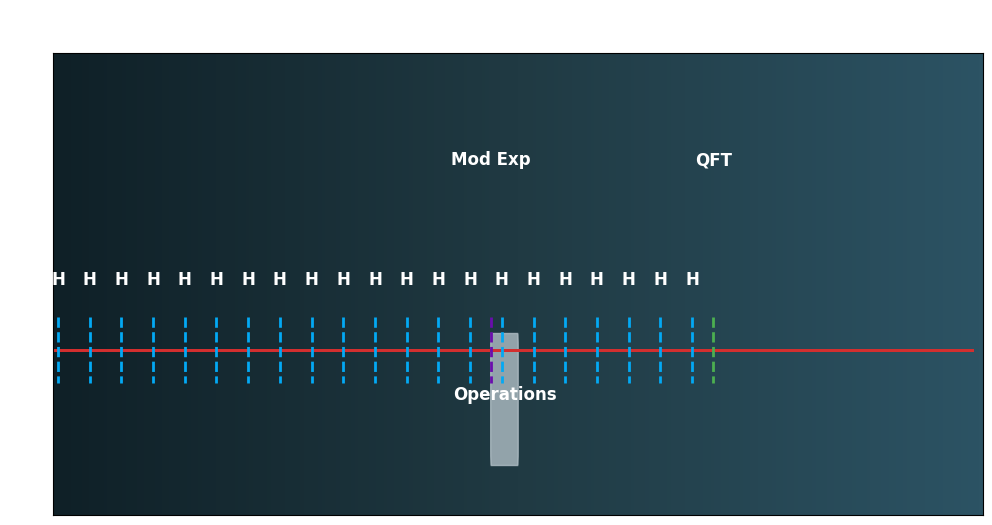

In [11]:
# Execution of Shor's Algorithm

def main():
    print("***** CLASSIC REPRESENTATION OF QUANTUM FACTORISATION *****")
    N = int(input("Enter a number to factorize: "))
    factors = prime_factors(N)
    print(f"The prime factors of {N} are: {sorted(factors)}")

    # Generate and display the quantum circuit
    n = int(np.ceil(np.log2(N)))
    plot_quantum_circuit(n)


# Execute the main function
main()